<a href="https://colab.research.google.com/github/aviraljoshi23/Diabetes_Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings. filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
df=pd.read_csv("diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here the actual shape of dataset


In [6]:
df.shape

(768, 9)

“Outcome” is the feature I'm going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1.

In [7]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


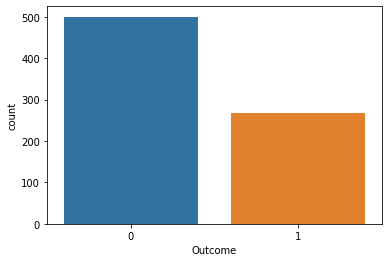

In [8]:
sns.countplot(df['Outcome'],label="Count")

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [10]:
df.isnull().values.any()

False

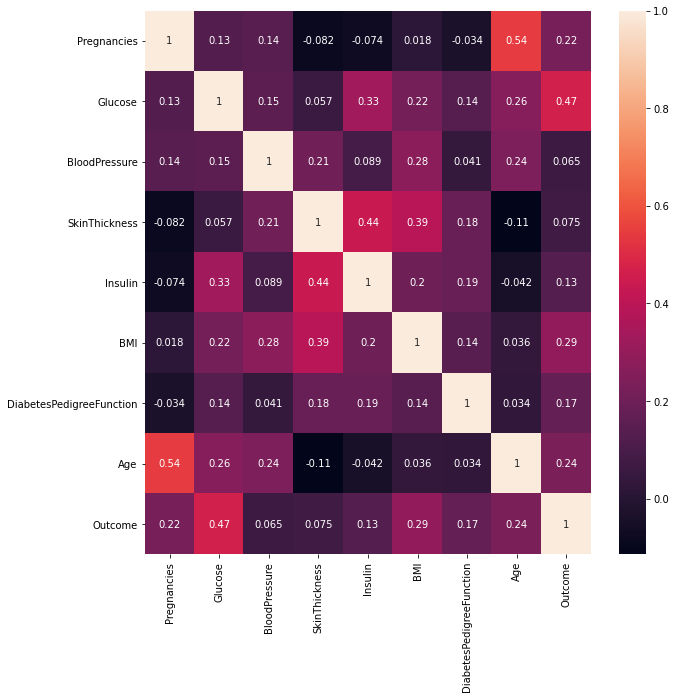

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)

#Checking how manys row containg missing value

In [14]:
print("Total number of rows :{0}",format(len(df)))
print("Number of missing value in Pregnancies :{0}",format(len(df.loc[df['Pregnancies']==0])))
print("Number of missing value in Glucose :{0}",format(len(df.loc[df['Glucose']==0])))
print("Number of missing value in Blood Pressure :{0}",format(len(df.loc[df['BloodPressure']==0])))
print("Number of missing value in Skin Thickness :{0}",format(len(df.loc[df['SkinThickness']==0])))
print("Number of missing value in Insulin :{0}",format(len(df.loc[df['Insulin']==0])))
print("Number of missing value in BMI :{0}",format(len(df.loc[df['BMI']==0])))
print("Number of missing value in DiabetesPedigreeFunction :{0}",format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("Number of missing value in Age :{0}",format(len(df.loc[df['Age']==0])))


Total number of rows :{0} 768
Number of missing value in Pregnancies :{0} 111
Number of missing value in Glucose :{0} 5
Number of missing value in Blood Pressure :{0} 35
Number of missing value in Skin Thickness :{0} 227
Number of missing value in Insulin :{0} 374
Number of missing value in BMI :{0} 11
Number of missing value in DiabetesPedigreeFunction :{0} 0
Number of missing value in Age :{0} 0


In [15]:
#I'm filling those missing value using imputer 
from sklearn.impute import SimpleImputer
fill_missing_value=SimpleImputer(missing_values=np.nan, strategy='median')
x_train=fill_missing_value.fit_transform(x_train)
x_test=fill_missing_value.fit_transform(x_test)

#K-Nearest Neighbors to Predict Diabetes

In [18]:
training_accuracy = []
test_accuracy = []
from sklearn.neighbors import KNeighborsClassifier
neighbors_settings = range(1,11)#Ranging it at 5  
for n_neighbors in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train, y_train)
  training_accuracy.append(knn.score(x_train, y_train))
  test_accuracy.append(knn.score(x_test,y_test))

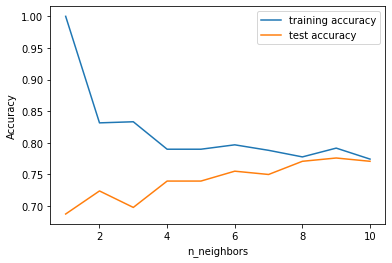

In [19]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Accuracy score of the k-nearest neighbors algorithm to predict diabetes.

In [20]:
print('Accuracy of training set in k nn classifier,{:.3f}'.format(knn.score(x_train,y_train)))
print('Accuracy of test set in k nn classifier,{:.3f}'.format(knn.score(x_test,y_test)))

Accuracy of training set in k nn classifier,0.774
Accuracy of test set in k nn classifier,0.771


#Decision Tree Classifier 

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2,random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


Feature importance in decision tree classifier


In [24]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.66319016 0.         0.         0.         0.33680984
 0.         0.        ]


 Lets visualize the feature importance of decision tree to predict diabetes.

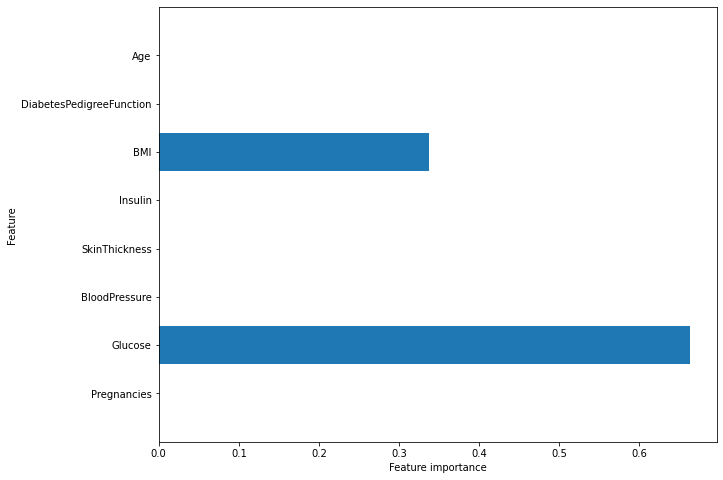

In [50]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(10,8))
    n_features =8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),df) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)

#Logistics regression 

In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print("Logistics regression accuracy:{0:2f}",format())

In [67]:
from sklearn.metrics import accuracy_score
print('Logistic Score:{0:3f}'.format(accuracy_score(y_test,y_pred)))

Logistic Score:0.770833


#Confusion matrix to  evaluate the prediction

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)

array([[108,  17],
       [ 27,  40]])

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.70      0.60      0.65        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192



In [71]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Outcome,,
0,108,17
1,27,40


#Deep Learning to Predict Diabetes

In [79]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))

Accuracy on training set: 0.74
Accuracy on test set: 0.67


Now i will re-scale my data so that it fulfills these requirements to predict diabetes with a good accuracy.

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


Now i will increse the iterators and alpha parameters to make our model stronger enough .

In [84]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.797


The result is good, but i'm  not able to increase the test accuracy further.  our best model so far is default deep learning model after scaling i guess

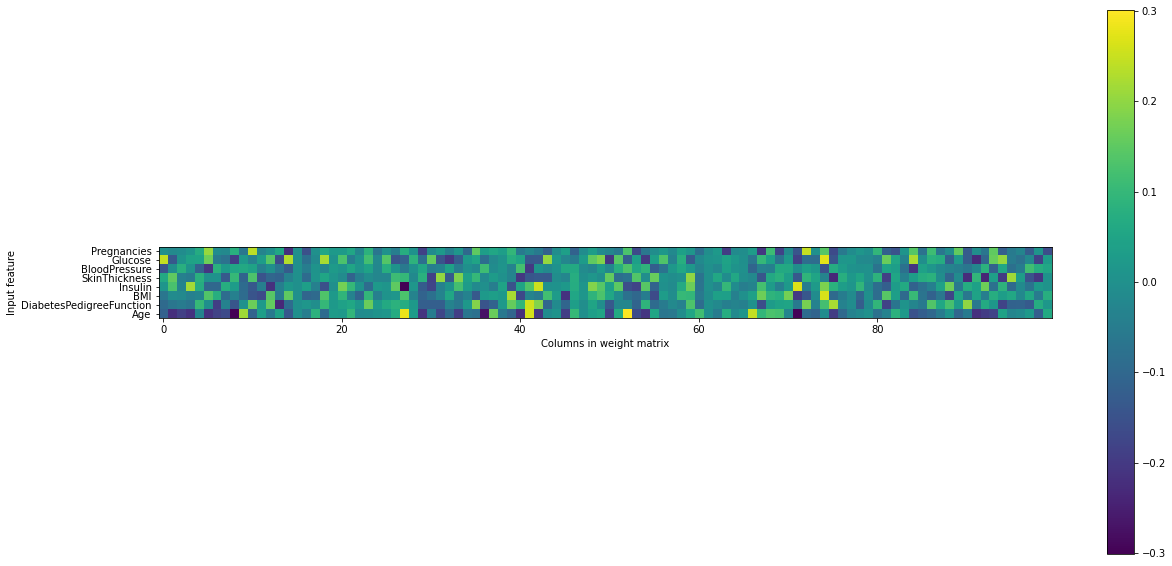

In [92]:
plt.figure(figsize=(20, 10))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8),df)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()